In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [95]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [97]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
## Detecting Quantitave and Qualitative attributes
def qual_quant_features(data):
    dtypes = list(map(lambda x:str(x),list(data.dtypes)))
    qualitative = []
    quantitative = []
    for i in range(len(dtypes)):
        if dtypes[i] == 'object':
            qualitative.append(data.columns[i])
        else:
            quantitative.append(data.columns[i])
    return qualitative,quantitative

qualitative,quantitative = qual_quant_features(train)
quantitative.pop(quantitative.index('SalePrice')) 
quantitative.pop(quantitative.index('Id')) 


'Id'

In [99]:
## Concatenating Training and testing sets to handle missing data and apply data transformations
data_concat = pd.concat([train,test],sort=False).reset_index(drop=True)
data_concat = data_concat.drop(['SalePrice','Id'],axis=1)

In [100]:
## Analyzing missing values in concatenated dataset
# finding no. of missing values and sorting predictors in descending order or no. of missing values
missing = data_concat.isnull().sum().sort_values(ascending=False)

# filtering only those predictors with non-zero missing values
missing = missing[missing>0]

# finding percentage of missing values out of total no. of records
percent = round(missing/data_concat.shape[0]*100,2)

# getting names of predictors having missing values
names = list(missing.index.values)
data_type = []
# getting the data type of predictors with missing values
for col in names:
    data_type.append(str(data_concat[col].dtype))

# creating a missing value analysis dataframe with predictor, data type, missing percentage    
df1 = pd.DataFrame({'Data Type':data_type,'No. Missing':missing, 'Percentage':percent})
missing_data = data_concat[names]
missing_col_vals = pd.DataFrame()
names = list(missing_data.columns)
for col in names:
    missing_col_vals[col] = pd.Series(missing_data[col].value_counts().index)

df2 = missing_col_vals.transpose()   

missing_analysis = pd.concat([df1,df2],axis=1)
missing_analysis

,Data Type,No. Missing,Percentage,0,1,2
PoolQC,object,2909,99.66,Ex,Gd,Fa
MiscFeature,object,2814,96.40,Shed,Gar2,Othr
Alley,object,2721,93.22,Grvl,Pave,NaN
Fence,object,2348,80.44,MnPrv,GdPrv,GdWo
FireplaceQu,object,1420,48.65,Gd,TA,Fa
LotFrontage,float64,486,16.65,60,80,70
GarageCond,object,159,5.45,TA,Fa,Gd
GarageQual,object,159,5.45,TA,Fa,Gd
GarageYrBlt,float64,159,5.45,2005,2006,2007
GarageFinish,object,159,5.45,Unf,RFn,Fin


In [101]:
## Handling missing values due to data description/format
## Defining Nan columns attributed to data description given in Kaggle. For ex. 'Nan' in Fence column means no fence
nan_columns = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
               'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
# filling kaggle definined nan values as 'None'
data_concat[nan_columns] = data_concat[nan_columns].fillna('None')

In [102]:
## Re-Analyzing missing values in concatenated dataset
missing = data_concat.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
percent = round(missing/data_concat.shape[0]*100,2)
names = list(missing.index.values)
data_type = []
for col in names:
    data_type.append(str(data_concat[col].dtype))
    
df1 = pd.DataFrame({'Data Type':data_type,'No. Missing':missing, 'Percentage':percent})
df1

,Data Type,No. Missing,Percentage
LotFrontage,float64,486,16.65
GarageYrBlt,float64,159,5.45
MasVnrArea,float64,23,0.79
MSZoning,object,4,0.14
Functional,object,2,0.07
BsmtHalfBath,float64,2,0.07
Utilities,object,2,0.07
BsmtFullBath,float64,2,0.07
BsmtFinSF1,float64,1,0.03
Exterior1st,object,1,0.03


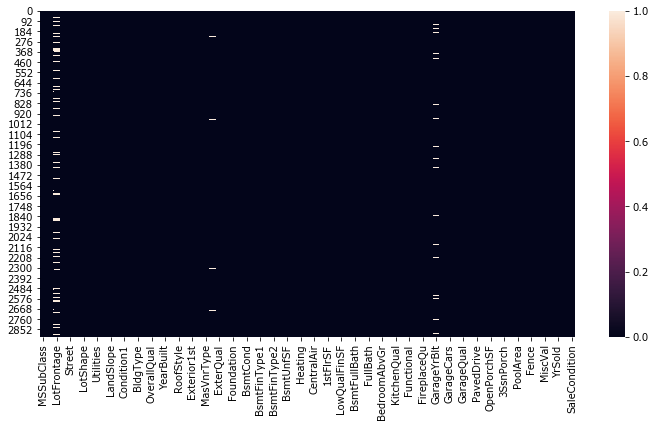

In [103]:
plt.figure(figsize=(12,6))
sns.heatmap(data_concat.isnull())

In [104]:
## Using KNN imputation for missing values in quantitative attributes
import sklearn.impute as imp
imputer = imp.KNNImputer(n_neighbors=2)
data_concat[quantitative] = imputer.fit_transform(data_concat[quantitative])

In [105]:
## Re-Analyzing missing values in concatenated dataset
missing = data_concat.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
percent = round(missing/data_concat.shape[0]*100,2)
names = list(missing.index.values)
data_type = []
for col in names:
    data_type.append(str(data_concat[col].dtype))
    
df1 = pd.DataFrame({'Data Type':data_type,'No. Missing':missing, 'Percentage':percent})
df1

,Data Type,No. Missing,Percentage
MSZoning,object,4,0.14
Functional,object,2,0.07
Utilities,object,2,0.07
Exterior1st,object,1,0.03
SaleType,object,1,0.03
Electrical,object,1,0.03
Exterior2nd,object,1,0.03
KitchenQual,object,1,0.03


In [106]:
## mode imputation for remaining columns which are all categorical attributes
nan_cols = list(df1.index.values)
for col in nan_cols:
    data_concat[col] = data_concat[col].fillna(data_concat[col].mode()[0])

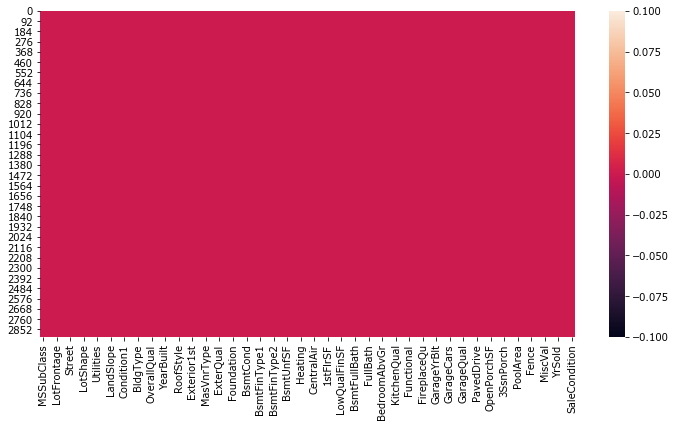

In [107]:
## checking if all missing values have been filled
plt.figure(figsize=(12,6))
sns.heatmap(data_concat.isnull())

In [159]:
# Hence all our missing values have been handled
data_concat.isnull().sum().sum()

0

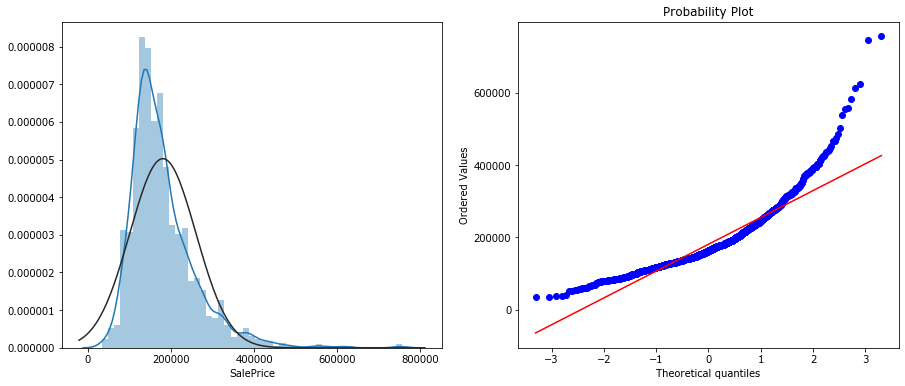

In [109]:
## Plotting distribution of Response variable (Sale Price)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'],fit=sp.stats.norm);
plt.subplot(1,2,2)
res = sp.stats.probplot(train['SalePrice'], plot=plt)

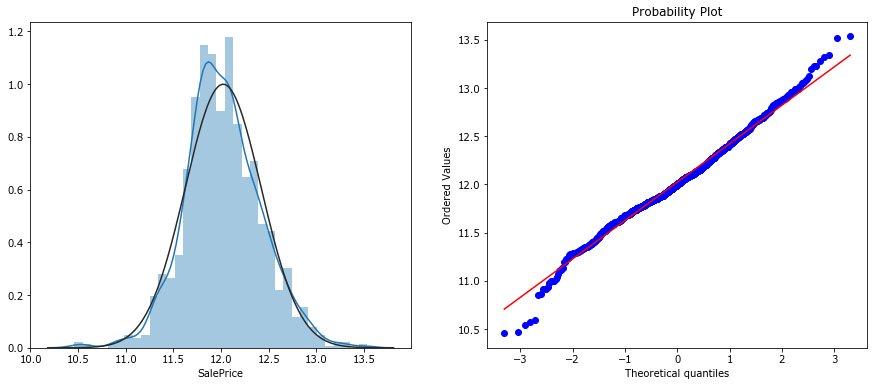

In [110]:
## Plotting distributions after log transform of Response
Y_log = np.log1p(train['SalePrice'])
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(Y_log,fit=sp.stats.norm);
plt.subplot(1,2,2)
res = sp.stats.probplot(Y_log, plot=plt)

In [111]:
# Replacing reponse variable with log transformed response
train = train.drop(['SalePrice'],axis=1)
train['Y_log'] = Y_log


In [112]:
## analyzing unique values in the qualitative attributes
qualitative_vals = pd.DataFrame()
for col in qualitative:
    qualitative_vals[col] = pd.Series(data_concat[col].value_counts().index)
qualitative_vals.transpose()

,0,1,2,3,4
MSZoning,RL,RM,FV,RH,C (all)
Street,Pave,Grvl,NaN,NaN,NaN
Alley,None,Grvl,Pave,NaN,NaN
LotShape,Reg,IR1,IR2,IR3,NaN
LandContour,Lvl,HLS,Bnk,Low,NaN
Utilities,AllPub,NoSeWa,NaN,NaN,NaN
LotConfig,Inside,Corner,CulDSac,FR2,FR3
LandSlope,Gtl,Mod,Sev,NaN,NaN
Neighborhood,NAmes,CollgCr,OldTown,Edwards,Somerst
Condition1,Norm,Feedr,Artery,RRAn,PosN


In [114]:
## checking skewness and normality of quantitative attributes
def skew_analysis(data,columns):
    skewness_vals = []
    p_vals = []
    shap = []
    for col in columns:
        skewness_vals.append(sp.stats.skew(data[col]))
        p_vals.append(sp.stats.skewtest(data[col])[1])
        shap.append(sp.stats.shapiro(data[col])[1])
    skewness_vals = pd.Series(skewness_vals,index=quantitative)
    p_vals = pd.Series(p_vals,index=quantitative)
    shap = pd.Series(shap,index=quantitative)
    df_skew = pd.DataFrame({'Skewness':skewness_vals,'Skewness=0 P-value':p_vals,'Shapiro P-value':shap})
    df_skew = df_skew.sort_values(by='Skewness',ascending=False)
    return df_skew

df_skew = skew_analysis(data_concat,quantitative)
df_skew

,Skewness,Skewness=0 P-value,Shapiro P-value
MiscVal,21.947195,0.000000e+00,0.000000e+00
PoolArea,16.898328,0.000000e+00,0.000000e+00
LotArea,12.822431,0.000000e+00,0.000000e+00
LowQualFinSF,12.088761,0.000000e+00,0.000000e+00
3SsnPorch,11.376065,0.000000e+00,0.000000e+00
KitchenAbvGr,4.302254,0.000000e+00,0.000000e+00
BsmtFinSF2,4.146143,0.000000e+00,0.000000e+00
EnclosedPorch,4.003891,0.000000e+00,0.000000e+00
ScreenPorch,3.946694,0.000000e+00,0.000000e+00
BsmtHalfBath,3.931594,0.000000e+00,0.000000e+00


In [115]:
## Analysing most common value and percentage of occurance
most_common = []
occ = []
for col in quantitative:
    most_common.append(data_concat[col].value_counts().index[0])
    occ.append(list(data_concat[col].value_counts())[0])
most_common = pd.Series(most_common,index=quantitative)
occ = pd.Series(occ,index=quantitative)
perc = pd.Series(round(occ/data_concat.shape[0]*100,2))
df_common = pd.DataFrame({'Most Common Value':most_common,'No. of occurances':occ,'Percentage':perc})
df_common.sort_values(['Most Common Value','No. of occurances'],ascending=False)

,Most Common Value,No. of occurances,Percentage
LotArea,9600.0,44,1.51
YrSold,2007.0,692,23.71
YearBuilt,2005.0,142,4.86
GarageYrBlt,2005.0,142,4.86
YearRemodAdd,1950.0,361,12.37
1stFlrSF,864.0,46,1.58
GrLivArea,864.0,41,1.40
LotFrontage,60.0,286,9.80
MSSubClass,20.0,1079,36.96
TotRmsAbvGrd,6.0,844,28.91


In [116]:
df_analysis = pd.concat([df_skew,df_common],axis=1).sort_values(['Percentage'],ascending = False)
df_analysis

,Skewness,Skewness=0 P-value,Shapiro P-value,Most Common Value,No. of occurances,Percentage
PoolArea,16.898328,0.000000e+00,0.000000e+00,0.0,2906,99.55
3SsnPorch,11.376065,0.000000e+00,0.000000e+00,0.0,2882,98.73
LowQualFinSF,12.088761,0.000000e+00,0.000000e+00,0.0,2879,98.63
MiscVal,21.947195,0.000000e+00,0.000000e+00,0.0,2816,96.47
KitchenAbvGr,4.302254,0.000000e+00,0.000000e+00,1.0,2785,95.41
BsmtHalfBath,3.931594,0.000000e+00,0.000000e+00,0.0,2744,94.00
ScreenPorch,3.946694,0.000000e+00,0.000000e+00,0.0,2663,91.23
BsmtFinSF2,4.146143,0.000000e+00,0.000000e+00,0.0,2572,88.11
EnclosedPorch,4.003891,0.000000e+00,0.000000e+00,0.0,2460,84.28
HalfBath,0.694566,3.488748e-44,0.000000e+00,0.0,1834,62.83


In [117]:
for col in quantitative:
    if sp.stats.skew(data_concat[col]) > 0.5:
         data_concat[col] = sp.special.boxcox1p(data_concat[col], sp.stats.boxcox_normmax(data_concat[col] + 1))

C:\Users\chait\Anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\chait\Anaconda3\lib\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


From the above analysis, we see that a lot of our predictors are highly skewed. An example of this is the PoolArea predictor. If a house has no pool, its value is 0. If a house has a pool, its value is the actual pool area. Since 99.55% of the houses in the dataset has no pool we have 90% of the values as 0 while the other values are high (500+). This causes a heavy left skew in the data distribution. Also the actual pool area doesnt add a lot of information as non-zero values are less than 0.5% of the total records. Hence we can perform some feature engineering by transforming this predictor into a binary predictor having 0 if the house has no pool, and 1 if the house has a pool. This reduces skewness too.

In [118]:
# Feature Engineering
# converting pool area to binary
data_concat['Pool'] = data_concat['PoolArea'].apply(lambda x:1 if x>0 else 0)
data_concat.drop('PoolArea',axis=1)

# converting 3ssnporch to binary
data_concat['has3SsnPorch'] = data_concat['3SsnPorch'].apply(lambda x:1 if x>0 else 0)
data_concat.drop('3SsnPorch',axis=1)

data_concat['2ndFlrSF'] = data_concat['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data_concat['GarageArea'] = data_concat['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data_concat['TotalBsmtSF'] = data_concat['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data_concat['Fireplaces'] = data_concat['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

data_concat = data_concat.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

data_concat['YrBltAndRemod']=data_concat['YearBuilt']+data_concat['YearRemodAdd']
data_concat['TotalSF']=data_concat['TotalBsmtSF'] + data_concat['1stFlrSF'] + data_concat['2ndFlrSF']

data_concat['Total_sqr_footage'] = (data_concat['BsmtFinSF1'] + data_concat['BsmtFinSF2'] +
                                 data_concat['1stFlrSF'] + data_concat['2ndFlrSF'])

data_concat['Total_Bathrooms'] = (data_concat['FullBath'] + (0.5 * data_concat['HalfBath']) +
                               data_concat['BsmtFullBath'] + (0.5 * data_concat['BsmtHalfBath']))

data_concat['Total_porch_sf'] = (data_concat['OpenPorchSF'] + data_concat['3SsnPorch'] +
                              data_concat['EnclosedPorch'] + data_concat['ScreenPorch'] +
                              data_concat['WoodDeckSF'])


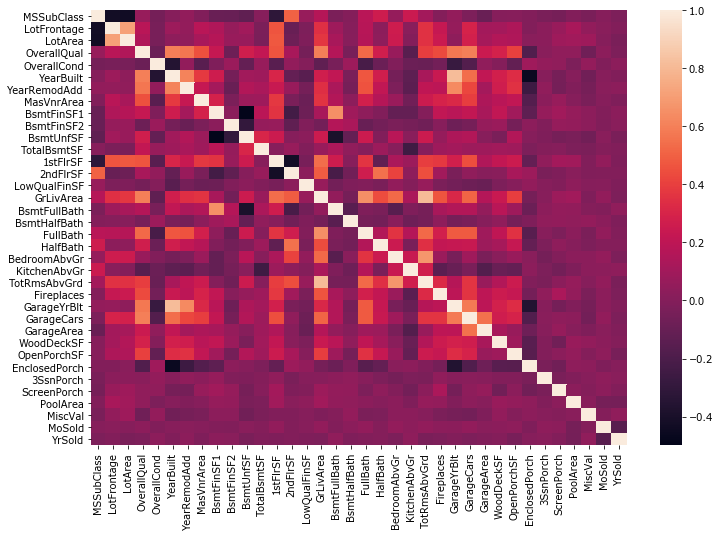

In [119]:
plt.figure(figsize=(12,8))
sns.heatmap(data_concat[quantitative].corr())

In [120]:
data_concat2 = pd.get_dummies(data_concat)
data_concat2.shape

(2919, 301)

In [121]:
X_train = data_concat2.iloc[:(train.shape[0]),:]
X_test = data_concat2.iloc[train.shape[0]:,:]
Y_train = Y_log

In [125]:
data_concat2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.502440,13.130447,13.424521,7.0,3.989638,2003.0,2003.0,19.497104,117.673012,0.0,...,0,0,0,1,0,0,0,0,1,0
1,4.250991,14.673298,13.694528,6.0,5.996435,1976.0,1976.0,0.000000,146.564215,0.0,...,0,0,0,1,0,0,0,0,1,0
2,6.502440,13.452819,14.034134,7.0,3.989638,2001.0,2002.0,17.824749,91.442999,0.0,...,0,0,0,1,0,0,0,0,1,0
3,6.865584,12.575416,13.683422,7.0,3.989638,1915.0,1970.0,0.000000,52.712167,0.0,...,0,0,0,1,1,0,0,0,0,0
4,6.502440,15.058560,14.550143,8.0,3.989638,2000.0,2000.0,25.499059,111.868911,0.0,...,0,0,0,1,0,0,0,0,1,0


In [140]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

In [127]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# model scoring and validation function
def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X, Y_train,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [129]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                      max_depth=3, min_child_weight=0,
                                      gamma=0, subsample=0.7,
                                      colsample_bytree=0.7,
                                      objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)



# setup models hyperparameters using a pipline
# The purpose of the pipeline is to assemble several steps that can be cross-validated together, while setting different parameters.
# This is a range of values that the model considers each time in runs a CV
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,0.003,0.01,0.1,1,10,100]


# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))


# Support Vector Regression : made robust to outliers
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))


In [130]:
# fit models
elastic_model = elasticnet.fit(X_train, Y_train)
lasso_model = lasso.fit(X_train, Y_train)
ridge_model = ridge.fit(X_train, Y_train)
svr_model = svr.fit(X_train, Y_train)
xgb_model = xgboost.fit(X_train, Y_train)

[23:50:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [133]:
# calculation K-Fold cross-validation training errors of models
# execution of this cell will take a few mins
elastic_model_train_rmse = cv_rmse(elastic_model, X=X_train).mean()
lasso_model_train_rmse = cv_rmse(lasso_model, X=X_train).mean()
ridge_model_train_rmse = cv_rmse(ridge_model, X=X_train).mean()
svr_model_train_rmse = cv_rmse(svr_model, X=X_train).mean()
xgb_model_train_rmse = cv_rmse(xgb_model, X=X_train).mean()

[23:56:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [134]:
# view training errors
print('Elastic Model Training error:',elastic_model_train_rmse)
print('Lasso Model Training error:',lasso_model_train_rmse)
print('Ridge Model Training error:',ridge_model_train_rmse)
print('SVR Model Training error:',svr_model_train_rmse)
print('XGB Model Training error:',xgb_model_train_rmse)

Elastic Model Training error: 0.12845080426471334
Lasso Model Training error: 0.12867067579846034
Ridge Model Training error: 0.1317160981176261
SVR Model Training error: 0.12829185435183987
XGB Model Training error: 0.12546693875614218


In [152]:
def blend_models_predict(X):  
    return ((0.2 * np.expm1(elastic_model.predict(X))) + \
            (0.2 * np.expm1(lasso_model.predict(X))) + \
            (0.2 * np.expm1(ridge_model.predict(X))) + \
            (0.2 * np.expm1(svr_model.predict(X))) + \
            (0.2 * np.expm1(xgb_model.predict(X))))

In [153]:
predictions = blend_models_predict(X_test)

In [154]:
Id = list(range(X_train.shape[0] + 1, X_train.shape[0] + 1 + X_test.shape[0]))

In [155]:
submission = pd.DataFrame({'Id':Id,'SalePrice':predictions})

In [156]:
submission.to_csv("submission.csv", index=False)

In [157]:
submission

,Id,SalePrice
0,1461,117981.365934
1,1462,157738.876024
2,1463,184676.658664
3,1464,199467.313431
4,1465,195073.613964
...,...,...
1454,2915,87556.494859
1455,2916,83573.928740
1456,2917,166286.642127
1457,2918,119344.562193
